# Assignment #03

This assignment is composed of 2 tasks that your teams is supposed complete.

1. Create a function to remove "blank slices" from a 3D dataset, which in this case consist of a 3D brain magnetic resonance image. "Blank slices" are slices that do not have signal in them. The "blank slices" should be removed across all three dimensions of the 3D volume.
2. Implement our use an existing data augmentation and generation utility for image segmentation applications


The deliverable of this assignment is this jupyter-notebook completed with your solution. 
    - Create a folder assignment-03. Put the jupyter-notebook with your solution in this repository and send the instructor the link. The repository is the same repository that your team created for assignment 1 and your team final project.

You are being assessed based on:

1. Code execution - 20% 
2. Clarity of the code (e.g., easy to follow, has pertinent comments, etc.) - 20%
3. Proper usage of the techniques seen in class - 40% 
4. Quality of the results - 20%

More details about the assessment are available in the rubric document in the class GitHub repository.

## Remove Blank Slices

For this function, remember that a blank slice is different from a slice that does not have the structire you want to segment.

In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pylab as plt

def remove_blank_slices(img,mask):
    """
    Function to remove blank slices
    """
    img_cropped = img
    mask_cropped = mask
    return img_cropped,mask_cropped

In [ ]:
data = nib.load("CC0001_philips_15_55_M.nii.gz").get_fdata() 
mask = nib.load("CC0001_philips_15_55_M_staple.nii.gz").get_fdata()

print("Image and mask shapes before cropping")
print(data.shape, mask.shape)


plt.figure()
plt.imshow(data[-1], cmap = "gray")
plt.imshow(mask[-1], alpha = 0.5)
plt.show()

data_cropped, mask_cropped = remove_blank_slices(data ,mask)

print("Image and mask shapes after cropping")
print(data_cropped.shape, mask_cropped.shape)

plt.figure()
plt.imshow(data_cropped[-1], cmap = "gray")
plt.imshow(mask_cropped[-1], alpha = 0.5)
plt.show()

## Data Augmentation and Generation

You can use available utils to propose a solution for this portio nof the assignment.

- [Imgaug](https://imgaug.readthedocs.io/en/latest/)
- [Albumentations](https://albumentations.ai/)
    - Keras. There is a nice tutorial [here](https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly). You can also extend the Data Generation utils we created in class to include data augmentation operations ([here](data_generator.py))

Remmeber, the essential steps are:
1. Load a batch of images (randomly and from random volumes)
2. Apply a predetrmined set of random data augmentation transformations
3. Crop the images and mask to a specific patch size and return a batch of samples.

all the picture have been appent to imglist


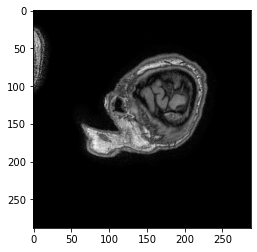

In [7]:
"coding = utf-8"


import imageio
from imgaug import augmenters as iaa
import os
import numpy as np
import matplotlib.pyplot as plt
# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
# e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second image.
sometimes = lambda aug: iaa.Sometimes(0.5, aug)



seq = iaa.Sequential([
 
    # Choose between 0 and 5 ways to do the transformation
    iaa.SomeOf((0, 5),
        [
                iaa.Fliplr(0.5), # Flip 50% of the images horizontally
                iaa.Flipud(0.5), # Flip 50% of the images vertically
                # Convert some images into their superpixel representation,
                # sample between 20 and 200 superpixels per image, but do
                # not replace all superpixels with their average, only
                # some of them (p_replace).
                sometimes(
                    iaa.Superpixels(
                        p_replace=(0, 1.0),
                        n_segments=(20, 200)
                    )
                ),
 
                # Blur each image with varying strength using
                # gaussian blur (sigma between 0 and 3.0),
                # average/uniform blur (kernel size between 2x2 and 7x7)
                # median blur (kernel size between 3x3 and 11x11).
                iaa.OneOf([
                    iaa.GaussianBlur((0, 3.0)),
                    iaa.AverageBlur(k=(2, 7)),
                    iaa.MedianBlur(k=(3, 11)),
                ]),
 
                # Sharpen each image, overlay the result with the original
                # image using an alpha between 0 (no sharpening) and 1
                # (full sharpening effect).
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),
 
                # Same as sharpen, but for an embossing effect.
                iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)),
 
 
                # Add gaussian noise to some images.
                # In 50% of these cases, the noise is randomly sampled per
                # channel and pixel.
                # In the other 50% of all cases it is sampled once per
                # pixel (i.e. brightness change).
                iaa.AdditiveGaussianNoise(
                    loc=0, scale=(0.0, 0.05*255)
                ),
 
                # Invert each image's chanell with 5% probability.
                # This sets each pixel value v to 255-v.
                iaa.Invert(0.05, per_channel=True), # invert color channels
 
                # Add a value of -10 to 10 to each pixel.
                iaa.Add((-10, 10), per_channel=0.5),
 
                # Add random values between -40 and 40 to images, with each value being sampled per pixel:
                iaa.AddElementwise((-40, 40)),
 
                # Change brightness of images (50-150% of original value).
                iaa.Multiply((0.5, 1.5)),
 
                # Multiply each pixel with a random value between 0.5 and 1.5.
                iaa.MultiplyElementwise((0.5, 1.5)),
 
                # Improve or worsen the contrast of images.
                iaa.ContrastNormalization((0.5, 2.0)),
 
 
        ],
        # do all of the above augmentations in random order
        random_order=True
    )
 
],random_order=True) #apply augmenters in random order





imgs_list_train = "A:/ENSF619.2-main/Assignment03/Sample/Images/"


# imglist=[]
filelist = os.listdir(imgs_list_train)
# print(filelist)
# for item in filelist:
img = np.load(imgs_list_train + item)
img = np.array(img)
plt.imshow(img,cmap = "gray") 
#     imglist.append(img)

print('all the picture have been appent to imglist')
# print(imglist)

In [8]:
import cv2
#Enhance the image in the folder, loop 100 times
savedpath = 'A:/ENSF619.2-main/Assignment03/Sample/assignment3_result/'

for item in filelist:

    img = np.load(imgs_list_train + item)
    img=np.array(img)
    new_arr = ((img - img.min()) * (1/(img.max() - img.min()) * 255)).astype('uint8')
    for count in range(50):
        images_aug = seq.augment_images(new_arr)


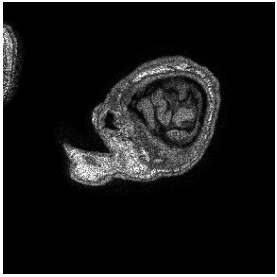

In [11]:
# Display some samples
plt.figure(dpi = 30, figsize = (18,12))
plt.imshow(images_aug,cmap = "gray")
plt.axis("off")
    
plt.show()